In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




np.random.seed(2)


In [2]:
dataset = pd.read_csv(r'C:\Users\Naman Bhoj\Desktop\Feb-April\in process 2021\cicn 3 FAKE JON naman\fake_job_postings.csv')

In [3]:
dataset

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
len(dataset)

17880

# combine text feature and make one single feature

In [5]:
dataset['text_feature']=dataset['title']+" " + dataset['department'] + " " + dataset['company_profile'] + " " + dataset['description'] + " " + dataset['requirements'] + " " + dataset['benefits'] + " " 

# the tab above shows huge data imbalance

In [6]:
dataset_text = dataset[['text_feature', 'fraudulent']]

In [7]:
dataset_text.isnull().sum()

text_feature    14095
fraudulent          0
dtype: int64

# drop null values

In [8]:
dataset_text = dataset_text.dropna()

In [9]:
x_data = dataset_text.drop(['fraudulent'],axis = 1)
y_data = dataset_text['fraudulent']

In [10]:
y_data.value_counts()

0    3647
1     138
Name: fraudulent, dtype: int64

# tab above shows huge data imbalance

In [11]:
x_data['text_feature'] = x_data["text_feature"].str.lower()
x_data.head()


,text_feature
1,customer service - cloud video production succ...
3,account executive - washington dc sales our pa...
6,head of content (m/f) androidpit founded in 20...
11,talent sourcer (6 months fixed-term contract) ...
14,account executive - sydney sales adthena is th...


# remove punctuations

In [12]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

x_data["text_feature"] = x_data["text_feature"].apply(lambda text: remove_punctuation(text))

x_data.head()

,text_feature
1,customer service cloud video production succe...
3,account executive washington dc sales our pas...
6,head of content mf androidpit founded in 2009 ...
11,talent sourcer 6 months fixedterm contract hr ...
14,account executive sydney sales adthena is the...


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

x_data["text_feature"] = x_data["text_feature"].apply(lambda text: remove_stopwords(text))



[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
x_data

,text_feature
1,customer service cloud video production succes...
3,account executive washington dc sales passion ...
6,head content mf androidpit founded 2009 fonpit...
11,talent sourcer 6 months fixedterm contract hr ...
14,account executive sydney sales adthena uk’s le...
...,...
17853,call centercustomer service customer service c...
17865,portfolio development associate paris rest fra...
17872,product manager product development flite deli...
17875,account director distribution sales vend looki...


In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

x_data["text_feature"] = x_data["text_feature"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
from wordcloud import WordCloud

# below tab shows text contained when non fraudulent

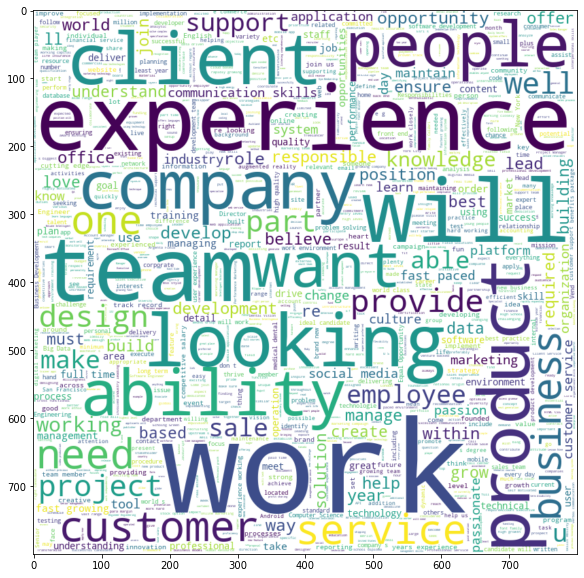

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
plt.figure(figsize = (10,10)) # Text that is not fraudulent(0)
wc = WordCloud(width = 800 , height = 800 , max_words = 1000,background_color = 'white').generate(" ".join(dataset_text[dataset_text.fraudulent == 0].text_feature))
plt.imshow(wc , interpolation = 'bilinear')

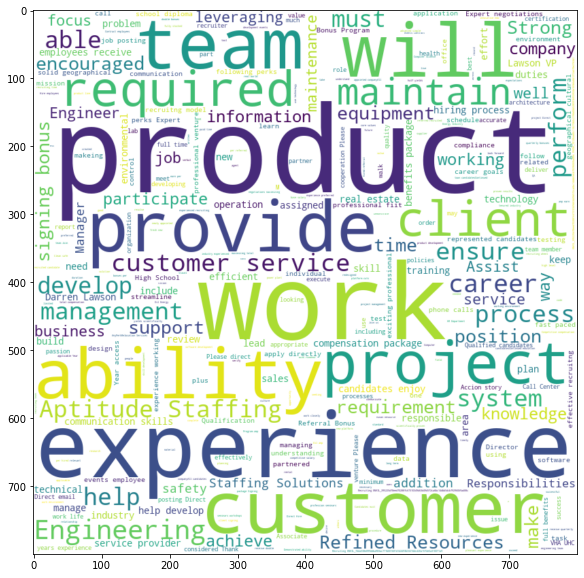

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
plt.figure(figsize = (10,10)) # Text  fraudulent(1)
wc = WordCloud(width = 800 , height = 800 , max_words = 1000,background_color = 'white').generate(" ".join(dataset_text[dataset_text.fraudulent == 1].text_feature))
plt.imshow(wc , interpolation = 'bilinear')

In [38]:
x_data

,text_feature
1,customer service cloud video production succes...
3,account executive washington dc sale passion i...
6,head content mf androidpit founded 2009 fonpit...
11,talent sourcer 6 month fixedterm contract hr w...
14,account executive sydney sale adthena uk’s lea...
...,...
17853,call centercustomer service customer service c...
17865,portfolio development associate paris rest fra...
17872,product manager product development flite deli...
17875,account director distribution sale vend lookin...


In [39]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 100000
embedding_dim = 32
max_length = 500

training_size = 10000
#Tokenization

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_data['text_feature'].values)
word_index = tokenizer.word_index
print(len(word_index))


59606


In [40]:
X = tokenizer.texts_to_sequences(x_data['text_feature'].values)                         #Tokenize the dataset
X = pad_sequences(X, maxlen=max_length)     #Padding the dataset

print(y_data.shape)

(3785,)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_data, test_size = 0.20,random_state=2)

In [42]:
bilstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.SpatialDropout1D(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [43]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train.shape

(3028, 500)

# fit bilstm

In [44]:
bilstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bilstm.fit(X_train,y_train,batch_size = 32, epochs = 20)

Epoch 1/20
95/95 [==============================] - 24s 211ms/step - loss: 0.3618 - accuracy: 0.9251
Epoch 2/20
95/95 [==============================] - 18s 187ms/step - loss: 0.0904 - accuracy: 0.9743
Epoch 3/20
95/95 [==============================] - 16s 168ms/step - loss: 0.0151 - accuracy: 0.9952s - loss: 0.0152 - accuracy
Epoch 4/20
95/95 [==============================] - 17s 174ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 5/20
95/95 [==============================] - 17s 175ms/step - loss: 1.8271e-04 - accuracy: 1.0000
Epoch 6/20
95/95 [==============================] - 16s 170ms/step - loss: 9.9183e-05 - accuracy: 1.0000
Epoch 7/20
95/95 [==============================] - 16s 172ms/step - loss: 7.9450e-05 - accuracy: 1.0000
Epoch 8/20
95/95 [==============================] - 18s 189ms/step - loss: 4.7120e-05 - accuracy: 1.0000
Epoch 9/20
95/95 [==============================] - 17s 177ms/step - loss: 3.6351e-05 - accuracy: 1.0000
Epoch 10/20
95/95 [=========================

# tokenise

In [45]:
predict_bilstm=bilstm.predict(X_test)
predict_bilstm = np.around(predict_bilstm, decimals = 0)
predict_bilstm

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
c_report=classification_report(y_test,predict_bilstm,target_names = ['0','1'],digits = 5)
print(c_report)

              precision    recall  f1-score   support

           0    0.98772   0.99862   0.99314       725
           1    0.95833   0.71875   0.82143        32

    accuracy                        0.98679       757
   macro avg    0.97303   0.85869   0.90728       757
weighted avg    0.98648   0.98679   0.98588       757



In [47]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predict_bilstm)
cf


array([[724,   1],
       [  9,  23]], dtype=int64)